# Python Homework 1

<b> Instructions:</b> This Python Homework is due on <b> Tuesday, April 12th, at 11:59 p.m.</b> You have to submit your version of this Jupyter Notebook via Gradescope!

In this homework you are supposed to use the random number generater random.random_sample from the numpy package to generate random numbers with three different distributions. 

Recall from the lecture that if $F:\mathbb{R}\rightarrow [0,1]$ is a distribution function with generalized inverse $F^{-1}:[0,1]\rightarrow \mathbb{R}$ and $U$ is a uniform random variable, then $F^{-1}(U)$ is a random variable with distribution function $F$.

Using the function random.random_sample from numpy package write three functions: 
* exponentialRV(seed, mean,n) that returns for given seed a bunch of n random variables from an exponential distribution with the provided mean. Derive the generalized inverse distribution function analytically for your simulation.
* binomial(seed, p,m,n) that returns for given seed a bunch of n Binomial distributed random numbers with the provided success probability p and the number of trial equal to m. You have to numerically calculate the inverse distribution function.
* funnyDiceRV(seed,n) that returns for given seed a bunch of n random number which describe a biased die with distribution $\mathbb{P}(\{1\})=\mathbb{P}(\{2\})=1/6$,$\mathbb{P}(\{3\})=\mathbb{P}(\{4\})=1/4$ and $\mathbb{P}(\{5\})=\mathbb{P}(\{6\})=1/12$.

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

Here should come your code for the three functions:

In [50]:
def exponentialRV(seed, mean,n):
    
    ##Here write your own code
    np.random.seed(seed) # set seed for random generator
    exponentialSample = []
    
    for i in range(1):
      u = np.random.random_sample(n)  # return array of floats from 0 to 1
      exponentialSample = -mean*np.log(1-u)
    
    return exponentialSample

In [66]:
def binomial(seed,p,m,n):
   
    ##Here write your own code
    np.random.seed(seed)
    binomialSample=[]
    
    for i in range(n):
      u=np.random.random_sample(1)  # F(x)
      
      sum=0
      for j in range(m):
        mass=(np.math.factorial(m)/(np.math.factorial(j)*np.math.factorial(m-j)))*(p**j)*((1-p)**(m-j))
        if 0<=(sum+mass)< u:
          sum=sum+mass
        else:
          binomialSample.append(j)
          break
    
    return binomialSample

In [67]:
def funnyDiceRV(seed, n):
      
    ##Here write your own code
    np.random.seed(seed)
    funnyDiceSample=[]
    biased=[0,(1/6),(1/3),(7/12),(4/5),(11/12),1] # given the pmf

    for i in range(n):
      p = np.random.random_sample(1) # float between [0, 1)
      for roll in range(1, 6+1):
        if biased[roll-1] <= p < biased[roll]:
          funnyDiceSample.append(roll)
    
    return funnyDiceSample

In [68]:
print(exponentialRV(105,3,5)) # You should test all three functions 
print(binomial(105, 0.7,20,5))
print(funnyDiceRV(105, 5))

[0.26236509 1.21717374 5.88456477 0.33509781 2.30128578]
[11, 13, 16, 11, 14]
[1, 3, 5, 1, 3]


You should use the following routine to plot a histogram of the distribution of all three simulated random variables

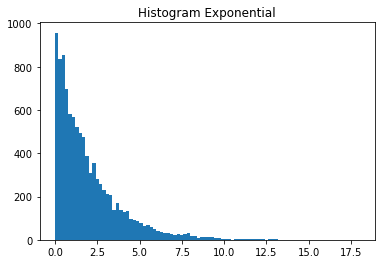

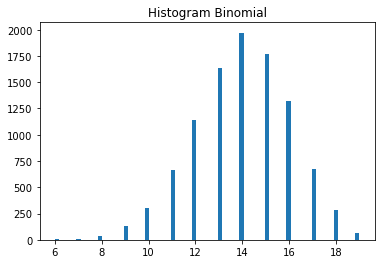

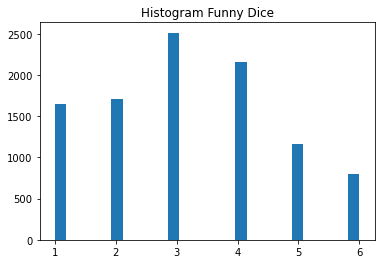

In [71]:
numberSimulations=10000
exponentialSamples=exponentialRV(1, 2,numberSimulations)
binomialSamples=binomial(1, 0.7,20,numberSimulations)
funnyDiceSamples=funnyDiceRV(1, numberSimulations)

#np.histogram(exponentialSamples)
plt.hist(exponentialSamples, bins='auto')
plt.title("Histogram Exponential")
plt.show()
plt.hist(binomialSamples, bins='auto')
plt.title("Histogram Binomial")
plt.show()
plt.hist(funnyDiceSamples, bins='auto')
plt.title("Histogram Funny Dice")
plt.show()

For the exponential random variable, you should then test the empirical expectation and variance of the random variables you generated. Assume you have generated random variables $X_1,X_2,X_3,\dots,X_n$ calculate the empirical mean 
\begin{equation}
\hat{\text{ }\mu} =\frac{\sum^n_{i=1} X_i}{n}
\end{equation}
and the empirical variance 
\begin{equation}
\hat{\text{ }\sigma} = \frac{\sum^n_{i=1}(X_i - \hat{\mu})^2}{n}
\end{equation}
Use 10000 simulations. Is the result of your calculation in line with what you expect? Why?

In [75]:
#Here you add the few lines of code for your calculations

# Number of simulations already set to 10000

# Empirical Mean
def emp_mean(exp_RV):
    sigma = 0 
    l=len(exp_RV) # length of exponential RV
    
    for i in range(l):
        sigma += exp_RV[i] 
    return sigma/l  

# Empirical Variance
def emp_var(exp_RV,u): 
    sigma = 0 
    l=len(exp_RV)
    
    for i in exp_RV: 
        sigma += (i-u)**2 
    return sigma/l

print('Empirical Mean:',emp_mean(exponentialSamples))
u = emp_mean(exponentialSamples) 
print('Empirical Variance:',emp_var(exponentialSamples,u))

Empirical Mean: 1.9770938809848242
Empirical Variance: 3.8485810293246394


Explanation: 

Yes the result is what I expected. 

Given a mean of 2, our result 1.977093 is a good approximation with 10000 simulations. 
Moreover, since the variance of an exponential distribution is 1/lambda^2, our expected variance is 2^2=4 and our result of 3.84858 is approximately around 4 (lambda = 1/2).
